# AVL BINARNO STABLO PRETRAŽIVANJA

(Adelson – Velskii – Landis)

AVL stablo je binarno stablo pretraživanja sa sljedećim svojstvima:
1. AVL stablo je uređeno binarno stablo pretraživanja.
2. Podstabla svakog čvora razlikuju se u visini najviše za jedan (1).
3. Svako podstablo je AVL stablo.
4. AVL stablo je samobalansirajuće stablo.

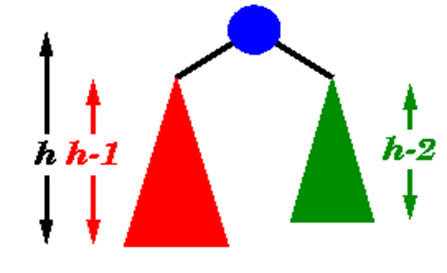

Osnovna ideja:
- Držati fiksnu razliku u dubini svakog podstabla kako se dodaju ili brišu elementi.
- Koristiti se rotacijama za održavanje balansa ako je ta razlika veća od +/-1. 


**Visina čvora u AVL STABLU**

Stablo s tri razine:

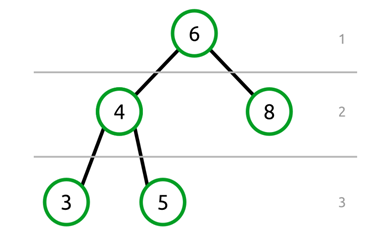

Korištenjem razina možemo odrediti rastojanje između dva povezana čvora.

Npr. rastojanje između čvora 6 i čvora 5 je 2, jer je čvor 5 na razini 3, čvor 6 na razini 1, pa je razlika 3-1=2.

- Kad govorimo o visinama čvorova djece generalno se referiramo na maksimalnu visinu cijelog stabla djece.
- Za AVL stablo sada je bitno da se visina lijevih i desnih čvorova nikad ne razlikuje za više od 1. 


#### Primjer nebalansiranih stabala

- Lijevo stablo je nebalansirano jer lijevo dijete korijena ima dvije razine, a desnog djeteta nema.
- Čvor 4 je balansiran jer lijevo i desno podstabla imaju istu visinu.

 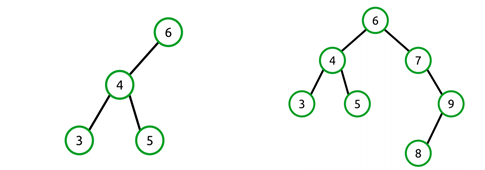

- Na desnom stablu lijevo podstablo ima dvije, a desno tri razine, naoko balansirano.
- Kako se balansiranost gleda rekurzivno za svaki čvor u stablu vidimo da je čvor 7 nebalansiran.


In [64]:
# AVL stablo
# Kod svakog dodavanja ili brisanja provjerava se je li stablo balansirano provjerama visine.
# Ako nije balansirano rade se rotacije radi balansa.

class Node(object):

    def __init__(self,data):
        self.data = data
        self.leftChild = None                               # lijevo dijete čvora
        self.rightChild = None                              # desno dijete čvora
        self.height = 0                                     # visina stabla
    
    def inorder (self):
        """Inorder obilazak stabla sa zadanim korijenom"""
        if self.leftChild:
            for n in self.leftChild.inorder():
                yield n

        yield self.data

        if self.rightChild:
            for n in self.rightChild.inorder():
                yield n

# Operacije nad AVL stablom
class AVL(object):
    def __init__(self):
        self.root = None                                    # Čvor korijen

# --------------------------- Računanje visine stabla  ---------------------------------
    def calcHeight(self,node):
        if not node:                                        # If this Node is Null
            return -1                                       # return -1; left and right child of leaf Nodes
        #print('\nVisina čvora: ', node.height)
        return node.height

# ------------------------------- Umetanje čvora u stablo ----------------------------
    def insert(self, data):
        self.root = self.insertNode(data, self.root)

    def insertNode(self, data, node):
        if not node:              # If it is a root node, create a new node
            print('Umetnut čvor {}\n'.format(data))
            return Node(data)
        if data < node.data:                                # If data < current node, go to left else right
            node.leftChild = self.insertNode(data, node.leftChild)
        else:
            node.rightChild = self.insertNode(data, node.rightChild)
        # Dohvati visinu novog čvora
        node.height = max(self.calcHeight(node.leftChild), self.calcHeight(node.rightChild)) + 1
        # Node je ubačen
        # Provjera je li bilo narušeno pravilo AVL stabla
        print('Umetnut čvor {}'.format(data))
        return self.settleViolation(data, node)


# -------------------- Provjera narušenosti pravila AVL stabla nakon dodavanja/umetanja novog čvora --------------------------
    def settleViolation(self, data, node):
        balance = self.calcBalance(node)
        print("Balans je:", balance)  # kontrolni ispis - može se zakomentirati
        # Slučaj 1: Otežanost lijevo-lijevo
        '''
            y je lijevo dijete od z i x je lijevo dijete od  y 
            T1, T2, T3 i T4 su podstabla.
            
                     z                                      y 
                    / \                                   /   \
                   y   T4      Desna rotacija (z)       x      z
                  / \          - - - - - - - - ->      /  \   /  \ 
                 x   T3                               T1  T2 T3  T4
                / \
              T1   T2
        '''
        
        if balance > 1 and data < node.leftChild.data:
            print("Lijevo-lijevo otezanost...")
            print("Debalans na čvoru: ", node.data)
            return self.rotateRight(node)

        # Slučaj 2: Otežanost desno-desno
        '''
            y je desno dijete od z i x je desno dijete od y 
            T1, T2, T3 i T4 su podstabla.
            
              z                                y
             /  \                            /   \ 
            T1   y     Lijeva rotacija (z)  z      x
                /  \   - - - - - - - ->    / \    / \
               T2   x                     T1  T2 T3  T4
                   / \
                 T3  T4
        '''
    
        if balance < -1 and data > node.rightChild.data:
            print('Desno-desno otezanost...')
            print("Debalans na čvoru: ", node.data)
            return self.rotateLeft(node)
        
        # Slučaj 3: Otežanost lijevo-desno
        '''
            y je lijevo dijete od z, a x je desno dijete od y 
            T1, T2, T3 i T4 su podstabla.
            
                 z                               z                           x
                / \                            /   \                        /  \ 
               y   T4  Lijeva rotacija (y)    x    T4  Desna rotacija (z) y      z
              / \      - - - - - - - - ->    /  \      - - - - - - - ->  / \    / \
            T1   x                          y    T3                    T1  T2 T3  T4
                / \                        / \
              T2   T3                    T1   T2
        '''
        if balance > 1 and data > node.leftChild.data:
            print('Left Right otezanost...')
            print("Debalans na čvoru: ", node.data)
            node.leftChild = self.rotateLeft(node.leftChild)
            return self.rotateRight(node)
        
        # Slučaj 4: Otežanost desno-lijevo
        '''
            y je desno dijete od z, a x je lijevo dijete od y 
            T1, T2, T3 i T4 su podstabla.
            
                   z                            z                            x
                  / \                          / \                          /  \ 
                T1   y   Desna rotacija (y)  T1   x   Lijeva rotacija (z) z      y
                    / \  - - - - - - - - ->     /  \   - - - - - - - ->  / \    / \
                   x   T4                      T2   y                  T1  T2  T3  T4
                  / \                              /  \
                T2   T3                           T3   T4
        '''
    
        if balance < -1 and data < node.rightChild.data:
            print('Right Left otezanost...')
            print("Debalans na čvoru: ", node.data, "Balans je: ", balance)
            node.rightChild = self.rotateRight(node.rightChild)     # Here node is the Root Node
            return self.rotateLeft(node)
        return node


# ------------------------------- Provjera balansiranosti stabla -------------------------------
    # If it returns value > 1, it means it is a Left heavy tree
    # Make Right rotation to balance it
    # If it returns value < 1, it means it is a Right heavy tree
    # Make Left rotation to balance it
    def calcBalance(self,node):
        if not node:
            return 0
        return self.calcHeight(node.leftChild) - self.calcHeight(node.rightChild)

    # Rotate Nodes to Right to Balance AVL Tree
    # O(1) time Complexity
    def rotateRight(self,node):
        print('Desna rotacija na čvoru ', node.data)      # C <- B <- D -> E; Root node is "D"
        tempLeftChild = node.leftChild                      # tempLeftChild => B
        t = tempLeftChild.rightChild                        # t = C

        # Rotate Right
        tempLeftChild.rightChild = node                     # "D" becomes right child of "B"; B -> D
        node.leftChild = t                                  # "C" becomes left child of "D"

        # Calculate Height of AVL Tree
        node.height = max(self.calcHeight(node.leftChild), self.calcHeight(node.rightChild)) + 1
        tempLeftChild.height = max(self.calcHeight(tempLeftChild.leftChild), self.calcHeight(tempLeftChild.rightChild)) + 1
        return tempLeftChild                                # Root Node after Rotation


    # Rotate Nodes to Left to Balance AVL Tree
    # O(1) time Complexity
    def rotateLeft(self,node):
        print('Lijeva rotacija na čvoru ', node.data)
        tempRightChild = node.rightChild
        t = tempRightChild.leftChild

        # Rotate Right
        tempRightChild.leftChild = node
        node.rightChild = t

        # Calculate Height of AVL Tree
        node.height = max(self.calcHeight(node.leftChild), self.calcHeight(node.rightChild)) + 1
        tempRightChild.height = max(self.calcHeight(tempRightChild.leftChild), self.calcHeight(tempRightChild.rightChild)) + 1
        return tempRightChild                                # Root Node after Rotation


# ------------------------------ Uklanjanje čvora iz stabla -----------------------
    # Remove Node [Deletion]
    def remove(self, data):
        if self.root:
            self.root = self.removeNode(data, self.root)

    def removeNode(self, data, node):
        
        if not node:
            return node
        if data < node.data:
             
            node.leftChild = self.removeNode(data,node.leftChild)
            return node
        if data > node.data:
            node.rightChild = self.removeNode(data, node.rightChild)
            return node
        else:
            # Brisanje čvora koji je list - nema djece 
            if not node.leftChild and not node.rightChild:
                print('Brisanje čvora list...',node.data)
                del node
                return None
            # Brisanje čvora koji ima samo desno dijete
            if not node.leftChild:
                print('Brisanje čvora koji ima samo desno dijete...', node.data)
                tempNode = node.rightChild
                del node
                return tempNode
             # Brisanje čvora koji ima samo lijevo dijete 
            if not node.rightChild:
                print('Brisanje čvora koji ima samo lijevo dijete...', node.data)
                tempNode = node.leftChild
                del node
                return tempNode
            
            # Brisanje čvora koji ima dva djeteta
            print('Brisanje čvora s dva djeteta...', node.data)
            tempNode = self.getPredecessor(node.leftChild)
            #print("tempNode:", tempNode.data)
            node.data = tempNode.data
            node.leftChild = self.removeNode(tempNode.data, node.leftChild)
        if not node:
            return node

        node.height = max(self.calcHeight(node.leftChild), self.calcHeight(node.rightChild)) + 1
        balance = self.calcBalance(node)

        # Doubly Left Heavy Tree
        if balance > 1 and self.calcBalance(node.leftChild) >= 0:
            return self.rotateRight(node)
        # Doubly Right Heavy Tree
        if balance < -1 and self.calcBalance(node.rightChild) <= 0:
            return self.rotateLeft(node)
        # Left Right Case
        if balance > 1 and self.calcBalance(node.leftChild) < 0:
            node.leftChild = self.rotateLeft(node.leftChild)
            return self.rotateRight(node)
        # Right Left Case
        if balance < -1 and self.calcBalance(node.rightChild) > 0:
            node.rightChild = self.rotateRight(node.rightChild)
            return self.rotateLeft(node)
        return node

    # dohvaćanje prethodnog čvora
    def getPredecessor(self, node):
        if node.rightChild:
            return self.getPredecessor(node.rightChild)
        return node


# --------------------- Prolazak inorder kroz stablo------------------
    def traverse(self):
        if self.root:
            self.traverseInOrder(self.root)


    def traverseInOrder(self, node):
        if node.leftChild:
            self.traverseInOrder(node.leftChild)
        print('%s' % node.data)
        if node.rightChild:
            self.traverseInOrder(node.rightChild)
    
       
    def find(self,root,key):
        if root is None:
            return None  # key not found
        if key < root.data:
            return self.find(root.leftChild, key)
        elif key > root.data:
            return self.find(root.rightChild, key)
        else:  # key is equal to node key
            return root.data        
    
       
    def pprint(self, width=64):
        """Attempts to pretty-print this tree's contents."""
        height =self.root.height
        nodes  = [(self.root, 0)]
        prev_level = 0
        repr_str = ''
         
        while nodes:
            n,level = nodes.pop(0)
            #print(n.data, level)
            if prev_level != level:
                prev_level = level
                repr_str += '\n'
            if not n:
                
                if level < height:
                    nodes.extend([(None, level+1), (None, level+1)])
                repr_str += '{val:^{width}}'.format(val='-', width=width//2**level)
            elif n:
                print(n.data, level)
                if n.leftChild or level < height:
                    nodes.append((n.leftChild, level+1))
                if n.rightChild or level < height:
                    nodes.append((n.rightChild, level+1))
                repr_str += '{val:^{width}}'.format(val=n.data, width=width//2**level)
        print(repr_str)           
            
      #---------------------------------------------------------------------------------      
      # iterator za obilazak stabla - poziva se metoda iorder() iz klase Node
      # koristenjem iteratora ne mora se pozivati funkcija za inoreder obilazak
    
    def __iter__ (self):
        """In order traversal of elements in the tree."""
        if self.root:
            return self.root.inorder()
    

In [65]:
# ------------------- Testing -----------------
if __name__ == '__main__':
   
    avl = AVL()
    avl.insert(10)
    avl.pprint()
    avl.insert(20)
    avl.pprint()
    avl.insert(30)
    avl.pprint()
    avl.insert(14)
    avl.pprint()
    avl.insert(13)
    avl.pprint()
    avl.traverse()
    avl.pprint()
    """
    avl.insert(5)
    avl.insert(6)
    avl.insert(4)
    avl.insert(3)
    avl.insert(15)
    avl.traverse()
    """
    avl.remove(20)
    avl.pprint()
    avl.remove(14)
    #avl.traverse()
    avl.pprint()

Umetnut čvor 10

10 0
                               10                               
Umetnut čvor 20

Umetnut čvor 20
Balans je: -1
10 0
20 1
                               10                               
               -                               20               
Umetnut čvor 30

Umetnut čvor 30
Balans je: -1
Umetnut čvor 30
Balans je: -2
Desno-desno otezanost...
Debalans na čvoru:  10
Lijeva rotacija na čvoru  10
20 0
10 1
30 1
                               20                               
               10                              30               
Umetnut čvor 14

Umetnut čvor 14
Balans je: -1
Umetnut čvor 14
Balans je: 1
20 0
10 1
30 1
14 2
                               20                               
               10                              30               
       -               14              -               -        
Umetnut čvor 13

Umetnut čvor 13
Balans je: 1
Umetnut čvor 13
Balans je: -2
Right Left otezanost...
Debalans na čvoru:  10 Balans je:  -

In [66]:
t4 = AVL()
for x in [7, 11, 3, 2, 1, 32, 44, 8]:
    t4.insert(x)

t4.pprint()
t4.remove(44)
t4.pprint()
print("Nadjen je čvor: ", t4.find(t4.root,32))

Umetnut čvor 7

Umetnut čvor 11

Umetnut čvor 11
Balans je: -1
Umetnut čvor 3

Umetnut čvor 3
Balans je: 0
Umetnut čvor 2

Umetnut čvor 2
Balans je: 1
Umetnut čvor 2
Balans je: 1
Umetnut čvor 1

Umetnut čvor 1
Balans je: 1
Umetnut čvor 1
Balans je: 2
Lijevo-lijevo otezanost...
Debalans na čvoru:  3
Desna rotacija na čvoru  3
Umetnut čvor 1
Balans je: 1
Umetnut čvor 32

Umetnut čvor 32
Balans je: -1
Umetnut čvor 32
Balans je: 0
Umetnut čvor 44

Umetnut čvor 44
Balans je: -1
Umetnut čvor 44
Balans je: -2
Desno-desno otezanost...
Debalans na čvoru:  11
Lijeva rotacija na čvoru  11
Umetnut čvor 44
Balans je: 0
Umetnut čvor 8

Umetnut čvor 8
Balans je: 1
Umetnut čvor 8
Balans je: 1
Umetnut čvor 8
Balans je: -1
7 0
2 1
32 1
1 2
3 2
11 2
44 2
8 3
                               7                                
               2                               32               
       1               3               11              44       
   -       -       -       -       8       -       -   

In [67]:
t2 = AVL()
for x in [ 3,2,1,6,8,7,9,10]:
    t2.insert(x)

t2.pprint()
t2.remove(10)
t2.pprint()    

Umetnut čvor 3

Umetnut čvor 2

Umetnut čvor 2
Balans je: 1
Umetnut čvor 1

Umetnut čvor 1
Balans je: 1
Umetnut čvor 1
Balans je: 2
Lijevo-lijevo otezanost...
Debalans na čvoru:  3
Desna rotacija na čvoru  3
Umetnut čvor 6

Umetnut čvor 6
Balans je: -1
Umetnut čvor 6
Balans je: -1
Umetnut čvor 8

Umetnut čvor 8
Balans je: -1
Umetnut čvor 8
Balans je: -2
Desno-desno otezanost...
Debalans na čvoru:  3
Lijeva rotacija na čvoru  3
Umetnut čvor 8
Balans je: -1
Umetnut čvor 7

Umetnut čvor 7
Balans je: 1
Umetnut čvor 7
Balans je: -1
Umetnut čvor 7
Balans je: -2
Desno-desno otezanost...
Debalans na čvoru:  2
Lijeva rotacija na čvoru  2
Umetnut čvor 9

Umetnut čvor 9
Balans je: 0
Umetnut čvor 9
Balans je: 0
Umetnut čvor 10

Umetnut čvor 10
Balans je: -1
Umetnut čvor 10
Balans je: -1
Umetnut čvor 10
Balans je: -1
6 0
2 1
8 1
1 2
3 2
7 2
9 2
10 3
                               6                                
               2                               8                
       1             

In [68]:
t3 = AVL()
for x in [ "black", "red", "green", "yellow", "blue", "one", "two", "second"]:
    t3.insert(x)

t3.pprint()
t3.remove('green')
t3.pprint()

Umetnut čvor black

Umetnut čvor red

Umetnut čvor red
Balans je: -1
Umetnut čvor green

Umetnut čvor green
Balans je: 1
Umetnut čvor green
Balans je: -2
Right Left otezanost...
Debalans na čvoru:  black Balans je:  -2
Desna rotacija na čvoru  red
Lijeva rotacija na čvoru  black
Umetnut čvor yellow

Umetnut čvor yellow
Balans je: -1
Umetnut čvor yellow
Balans je: -1
Umetnut čvor blue

Umetnut čvor blue
Balans je: -1
Umetnut čvor blue
Balans je: 0
Umetnut čvor one

Umetnut čvor one
Balans je: 0
Umetnut čvor one
Balans je: 0
Umetnut čvor two

Umetnut čvor two
Balans je: 1
Umetnut čvor two
Balans je: -1
Umetnut čvor two
Balans je: -1
Umetnut čvor second

Umetnut čvor second
Balans je: 1
Umetnut čvor second
Balans je: 2
Lijevo-lijevo otezanost...
Debalans na čvoru:  yellow
Desna rotacija na čvoru  yellow
Umetnut čvor second
Balans je: -1
Umetnut čvor second
Balans je: -1
green 0
black 1
red 1
blue 2
one 2
two 2
second 3
yellow 3
                             green                           

In [69]:
print("inoder obilazak stabla korištenjem iteratora")
for x in t3:
    print(x)

inoder obilazak stabla korištenjem iteratora
black
blue
one
red
second
two
yellow


In [70]:
# brisanje čvora 'blue'
t3.remove("blue")
t3.pprint()

# iteriranje po stablu
print("inoder obilazak stabla korištenjem iteratora")
for x in t3:
    print(x)

Brisanje čvora s dva djeteta... blue
Brisanje čvora list... black
Lijeva rotacija na čvoru  black
red 0
black 1
two 1
one 2
second 2
yellow 2
                              red                               
             black                            two               
       -              one            second          yellow     
inoder obilazak stabla korištenjem iteratora
black
one
red
second
two
yellow
